<a href="https://colab.research.google.com/github/Gilbertfritzzz/Aplikasi-Login/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Gilbert Fritztama]
- **Email:** [gilbertfritzz@gmail.com]
- **ID Dicoding:** [gilbertfritzz]

## Menentukan Pertanyaan Bisnis

- Jam berapa jumlah rata-rata penyewaan sepeda tertinggi, dan bagaimana dengan variasinya sepanjang hari?
- Bagaimana hubungan hari libur dengan rata-rata penyewaan?

## Import Semua Packages/Library yang Digunakan

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [72]:
day_df = pd.read_csv('/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [73]:
hour_df = pd.read_csv('/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Memeriksa tipe data pada tiap kolom yang terdapat pada bike_df

In [74]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [75]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


semua tipe data sudah sesuai

Assessing bike_df data

In [76]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [77]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Berdasarkan hasil diatas, tidak ada masalah pada tipe data tiap kolom pada day_df dan hour_df

In [78]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [79]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Semua tipe data sesuai dan tidak ada masalah

## Exploratory Data Analysis (EDA)

### Explore ...

Merge data

In [80]:
bike_df = hour_df.merge(day_df, on='dteday', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [81]:
bike_df.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [82]:
bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


In [83]:
bike_df.registered_hour.sum()

2672662

## Visualization & Explanatory Analysis

### Pertanyaan 1:

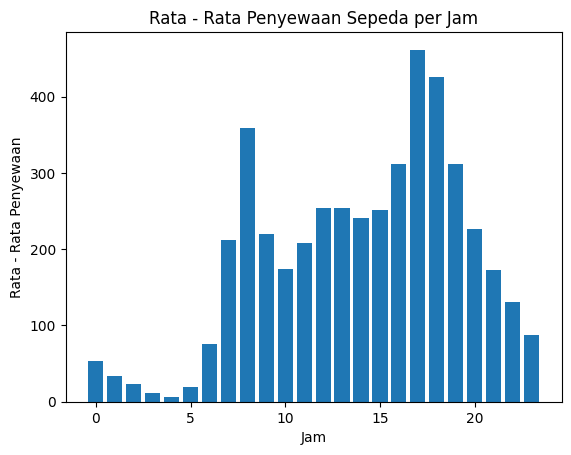

In [84]:
rent_hr = bike_df.groupby('hr')['cnt_hour'].mean()

plt.bar(rent_hr.index, rent_hr.values)

plt.title('Rata - Rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata - Rata Penyewaan')

plt.show()

Rata - rata penyewaan sepeda paling banyak terjadi pada jam 5pm-6pm dan paling sedikit jam 4am.

### Pertanyaan 2:

<ipython-input-85-fcd6ed10fc5f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette='Set1')


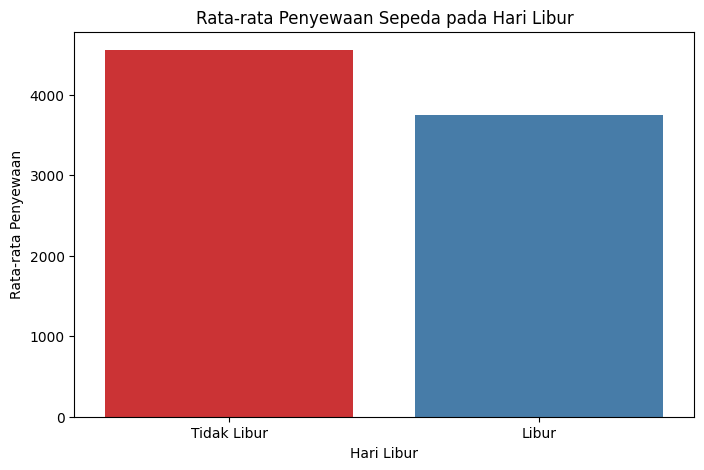

In [85]:
avg_holiday = bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

plt.figure(figsize=(8, 5))
sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette='Set1')

plt.title('Rata-rata Penyewaan Sepeda pada Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1], ['Tidak Libur', 'Libur'])

plt.show()

Rata-rata penyewaan sepeda terjadi saat hari tidak libur

## Conclusion

- Conclution pertanyaan 1 :

Rata - rata penyewaan sepeda paling banyak terjadi saat sore hari yaitu pada jam 5pm - 6 pm.

pada pagi dan sore adalah waktu dimana kebutuhan mobilitas pergi dan pulang kerja atau sekolah sangat diperlukan. Penggunaan sepeda menjadi opsi populer sebagai sarana transportasi ke tempat kerja atau sekolah pada pagi hari, dan sekaligus sebagai pilihan yang diminati saat orang-orang pulang pada sore hari.

Aktivitas fisik seperti bersepeda di pagi hari dan aktivitas rekreasi setelah jam kerja pada jam 6pm menunjukkan bahwa sepeda menjadi salah satu alternatif yang digunakan untuk meningkatkan kebugaran dan kesehatan.

Kondisi cuaca yang bersahabat pada pagi dan sore hari juga menjadi faktor motivasi tambahan bagi pengguna untuk melakukan aktivitas bersepeda di luar ruangan.


- Conclution pertanyaan 2 :

Rata - rata penyewaan terjadi saat hari tidak libur.

Disebabkan oleh tingginya aktivitas transportasi pada hari-hari kerja, saat orang pergi atau pulang dari pekerjaan. Peningkatan penyewaan pada hari-hari kerja kemungkinan menunjukan kebutuhan orang untuk menjalani aktivitas sehari-hari, seperti bekerja, bersekolah, atau berbelanja.

Penggunaan sepeda menjadi pilihan yang populer untuk perjalanan singkat, terutama pada hari-hari di mana orang memiliki rutinitas harian. Terdapat kemungkinan bahwa ada kelompok pengguna tertentu, seperti pekerja atau pelajar, yang secara khusus menggunakan layanan penyewaan sepeda pada hari-hari kerja.